<a href="https://colab.research.google.com/github/Sravani-05/Advanced-Dimensionality-Reduction-/blob/main/DM_Assignment_ImageDat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.datasets import fetch_olivetti_faces
# Load the data
data = fetch_olivetti_faces()
data.keys()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


dict_keys(['data', 'images', 'target', 'DESCR'])

In [2]:
inputs=data.data
target=data.target
images=data.images

In [3]:
target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

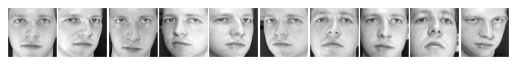

In [8]:
fig, axes = plt.subplots(1,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i],cmap="gray")

**PCA**

In [9]:
from sklearn.decomposition import PCA
#n_components=0.80 means it will return the Eigenvectors that have the 80% of the variation in the dataset
faces_pca = PCA(n_components=0.8)
faces_pca.fit(inputs)

PCA(n_components=0.8)

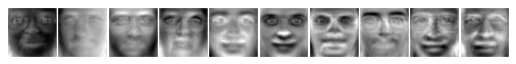

In [10]:
fig, axes = plt.subplots(1,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
 ax.imshow(faces_pca.components_[i].reshape(64,64),cmap="gray")

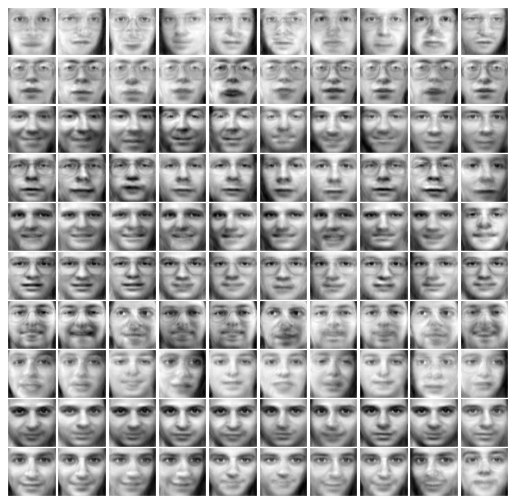

In [12]:
components = faces_pca.transform(inputs)
projected = faces_pca.inverse_transform(components)

fig, axes = plt.subplots(10,10,figsize=(9,9), subplot_kw={'xticks':[], 'yticks':[]},
            gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(64,64),cmap="gray")

**t-SNE**

In [13]:
def TSNE(n, df,target):
  from sklearn.manifold import TSNE
  model = TSNE(n_components = n, random_state = 42,verbose=0, perplexity=40, n_iter=400)
  tsne_data = model.fit_transform(df)
  print(tsne_data.shape)
  tsne_data = np.vstack((tsne_data.T, target)).T 
  return tsne_data

In [14]:
tsne_data = TSNE(2, inputs, target)
tsne_Idf = pd.DataFrame(tsne_data)
tsne_Idf

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


(400, 2)


,0,1,2
0,12.573973,-5.517671,0.0
1,11.860751,15.430540,0.0
2,12.154913,-5.920110,0.0
3,11.027962,7.582700,0.0
4,12.731546,14.518966,0.0
...,...,...,...
395,-6.751878,3.247428,39.0
396,10.630562,5.765073,39.0
397,-7.602188,3.588792,39.0
398,10.718883,6.066850,39.0


In [15]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(
        x = tsne_Idf.iloc[:,0],
        y = tsne_Idf.iloc[:,1],
        mode='markers',
        hovertext= tsne_Idf.iloc[:,2],
        #showlegend=True,
        marker=dict(
            size=10,
            color=tsne_Idf.iloc[:,2], #set color equal to a variable
            colorscale = 'Viridis', # one of plotly colorscales
            
            showscale=True,
            opacity=1,
            line_width=1
        )
    ))
  # figure layout
fig.update_layout(margin=dict(l=50,r=50,b=50,t=50),width=1000,height=500)
fig.layout.template = 'plotly_dark' 
    
fig.show()

**ISOMAP**

In [16]:
from sklearn.manifold import Isomap

def ISOMAP(n, df,target):
  model = Isomap(n_components=n)
  isomap_df=model.fit_transform(df)
  isomap_df.shape
  col_labels= ['ISO'+str(i) for i in range(1,n+1)]
  isomap_df  = pd.DataFrame(isomap_df[:,0:n], index=target.tolist(), columns=col_labels)
  isomap_df=isomap_df.reset_index()
  isomap_df.rename(columns={'index':'Label'}, inplace=True)
  return isomap_df


isomap_Idf = ISOMAP(2,inputs,target)
isomap_Idf

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_isomap.py:324: UserWarning:

The number of connected components of the neighbors graph is 4 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.

/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/usr/local/lib/python3.8/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

/

,Label,ISO1,ISO2
0,0,-19.671829,-1.777261
1,0,-10.238550,-8.300554
2,0,-19.185409,-6.021852
3,0,1.475908,2.736304
4,0,-17.321627,0.861024
...,...,...,...
395,39,5.291675,-0.488860
396,39,-2.425828,2.956596
397,39,1.052052,-0.410125
398,39,-0.584769,1.244189


**UMAP**

In [17]:
pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.2 MB/s 
     |████████████████████████████████| 1.1 MB 31.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=1a84b6e01c95491f9f1cf5076bc097c37f6f6ad727b895ac02f2df356c5397d8
  Stored in directory: /root/.cache/pip/wheels/a9/3a/67/06a8950e053725912e6a8c42c4a3a241410f6487b8402542ea
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55513 sha256=d2b47a787ad0cfac1244d978465406d8490e16d44cf805152db6e2edc5425804
  Stored in directory: /root/.cache/pip/wheels/1c/63/3a/29954bca1a27ba100ed8c27973a78cb71b43dc67aed62e80c3
Successfully built umap-learn pynndescent


In [18]:
import umap.umap_ as umap

def UMAP(n,df, target):
  umap_op = umap.UMAP(n_components=n)
  umap_df = umap_op.fit_transform(df)
  col_labels= ['UMAP'+str(i) for i in range(1,n+1)]
  umap_df  = pd.DataFrame(umap_df[:,0:n], index=target.tolist(), columns=col_labels)
  umap_df=umap_df.reset_index()
  umap_df.rename(columns={'index':'Label'}, inplace=True)
  return umap_df

umap_Idf = UMAP(2,inputs,target)
umap_Idf


,Label,UMAP1,UMAP2
0,0,10.661355,5.775684
1,0,10.975370,7.877655
2,0,10.622910,5.721512
3,0,7.865143,5.871626
4,0,10.803948,7.621129
...,...,...,...
395,39,8.094457,8.327940
396,39,8.202441,5.931307
397,39,8.057309,8.372595
398,39,7.904231,6.013617


In [19]:
fig = go.Figure(data=go.Scatter(
        x = umap_Idf.iloc[:,1],
        y = umap_Idf.iloc[:,2],
        mode='markers',
        hovertext= umap_Idf.iloc[:,0],
        marker=dict(
            size=10,
            color=umap_Idf.iloc[:,0], #set color equal to a variable
            colorscale = 'Viridis', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=1000,height=500)                 
fig.layout.template = 'plotly_dark' 
    
fig.show()

**LLE**

In [27]:
import umap.umap_ as umap

def UMAP(n,df, target):
  umap_op = umap.UMAP(n_components=n)
  umap_df = umap_op.fit_transform(df)
  col_labels= ['UMAP'+str(i) for i in range(1,n+1)]
  umap_df  = pd.DataFrame(umap_df[:,0:n], index=target.tolist(), columns=col_labels)
  umap_df=umap_df.reset_index()
  umap_df.rename(columns={'index':'Label'}, inplace=True)
  return umap_df

umap_Idf = UMAP(2,inputs,target)
umap_Idf


,Label,UMAP1,UMAP2
0,0,10.136469,6.667848
1,0,9.587405,4.610342
2,0,10.001868,6.846154
3,0,7.764795,7.621837
4,0,9.271181,4.927899
...,...,...,...
395,39,6.779030,5.006106
396,39,7.981451,7.448180
397,39,6.669962,5.147728
398,39,7.846789,7.495770


In [28]:
fig = go.Figure(data=go.Scatter(
        x = umap_Idf.iloc[:,1],
        y = umap_Idf.iloc[:,2],
        mode='markers',
        hovertext= umap_Idf.iloc[:,0],
        marker=dict(
            size=10,
            color=umap_Idf.iloc[:,0], #set color equal to a variable
            colorscale = 'Viridis', # one of plotly colorscales
            showscale=True,
            line_width=1
        )
    ))
fig.update_layout(margin=dict( l=100,r=100,b=100,t=100),width=1000,height=500)                 
fig.layout.template = 'plotly_dark' 
    
fig.show()

In [32]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [33]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [34]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [35]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

In [36]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [37]:
X2D_using_svd = X2D

**Using Scikit-Learn**

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [40]:
X2D[:6]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049],
       [-1.10436914,  0.20204953]])

In [41]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [42]:
np.allclose(X2D, -X2D_using_svd)

True

In [43]:
X3D_inv = pca.inverse_transform(X2D)

In [44]:
np.allclose(X3D_inv, X)

False

In [45]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.01017033779284855

In [46]:
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])

In [47]:
np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

True

In [48]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [49]:
Vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])